In [1]:
from utils import *
import math

In [2]:
def simple_experience_data(leg_map, field, congress = None, chamber = None):
    xs = []
    ys = []
    if congress is not None:
        congress = str(congress)
        for leg in leg_map.values():
            congress_map = leg["congress_map"]
            if congress in congress_map and field in congress_map[congress]:
                if chamber is not None and congress_map[congress]["chamber"] != chamber:
                    continue
                xs.append(congress_map[congress]["experience"])
                ys.append(congress_map[congress][field])
    else:
        for leg in leg_map.values():
            congress_map = leg["congress_map"]
            for congress_val in congress_map.values():
                if chamber is not None and congress_val["chamber"] != chamber:
                    continue
                if field in congress_val:
                    xs.append(congress_val["experience"])
                    ys.append(congress_val[field])
    return (xs, ys)

In [3]:
db, engine, meta = db_connect()

In [4]:
tables = db_tables(meta)

In [5]:
leg_map = get_leg_map(engine)

In [ ]:
xs, ys = simple_experience_data(leg_map, "bills_cosponsored", chamber = "house")

In [ ]:
plot_reg(xs, ys, title = "Bills cosponsored vs experience: senate", xlab = "Experience", ylab = "bills cosponsored")

In [ ]:
list(leg_map.values())[0]["congress_map"]

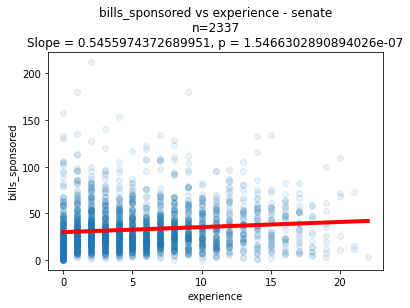

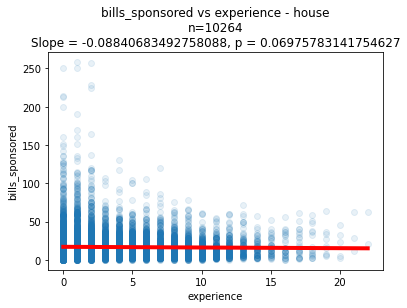

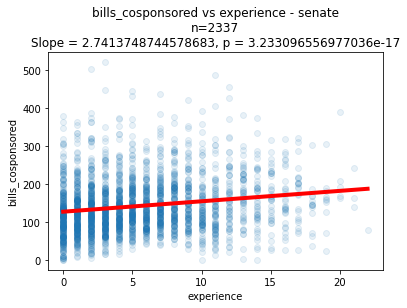

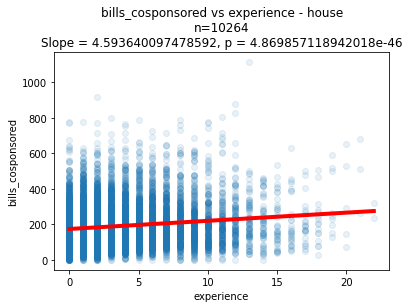

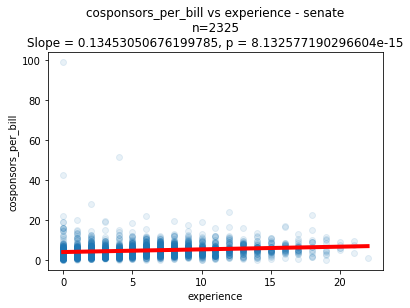

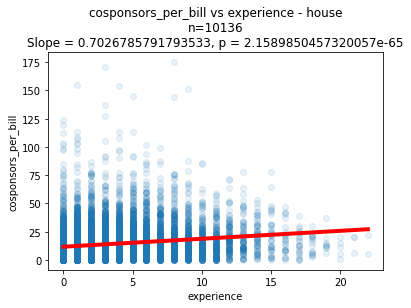

In [6]:
fields = ["bills_sponsored", "bills_cosponsored", "cosponsors_per_bill"]
chambers = ["senate", "house"]

for field in fields:
    for chamber in chambers: 
        xs, ys = simple_experience_data(leg_map, field, chamber = chamber)
        save_reg(xs, ys, title = "{} vs experience - {}".format(field, chamber), xlab = "experience", ylab = field)

In [8]:
nominate_xs = []
nominate_ys = []
for leg in leg_map.values():
    if "nominate" in leg:
        nominate_xs.append(len(leg["congress_map"]))
        nominate = leg['nominate']
        nominate_ys.append(math.sqrt(nominate["dim1"]**2 + nominate["dim2"]**2))

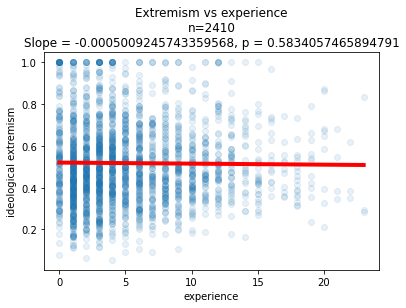

In [9]:
save_reg(nominate_xs, nominate_ys, title = "Extremism vs experience", xlab = "experience", ylab = "ideological extremism")